In [1]:
x <- rnorm(50)
y <- rnorm(x)

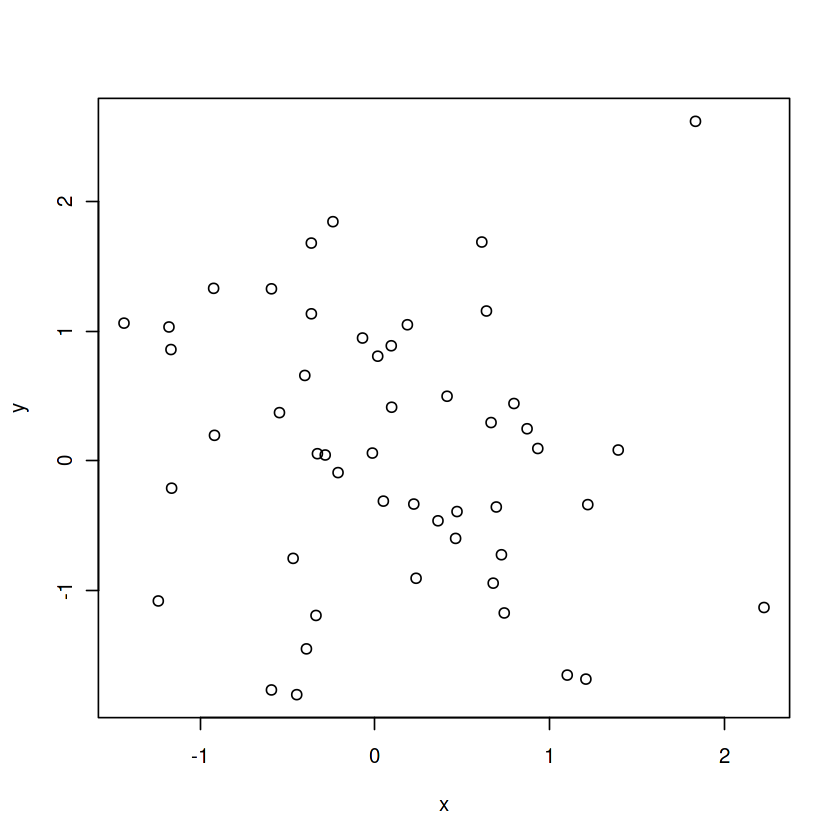

In [2]:
plot(x, y)

In [3]:
ls()

[1] "x" "y"

In [4]:
rm(x, y)

In [5]:
x <- 1:20
x

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [6]:
w <- 1 + sqrt(x)/2
w

[1] 1.500000 1.707107 1.866025 2.000000 2.118034 2.224745 2.322876 2.414214
 [9] 2.500000 2.581139 2.658312 2.732051 2.802776 2.870829 2.936492 3.000000
[17] 3.061553 3.121320 3.179449 3.236068

In [7]:
dummy <- data.frame(x=x, y= x + rnorm(x)*w)
dummy

x,y
<int>,<dbl>
1,0.4676241
2,0.5032307
3,1.8859744
4,-0.4387780
5,8.0456835
6,5.1635206
7,5.0418804
8,5.7384949
9,11.7869738


In [8]:
fm <- lm(y ~ x, data=dummy) # With y to the left of the tilde, we are modelling y dependent on x.
summary(fm)


Call:
lm(formula = y ~ x, data = dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7908 -1.2333 -0.6538  1.3670  3.7702 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.50000    1.04449  -0.479    0.638    
x            0.96300    0.08719  11.045  1.9e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.248 on 18 degrees of freedom
Multiple R-squared:  0.8714,	Adjusted R-squared:  0.8643 
F-statistic:   122 on 1 and 18 DF,  p-value: 1.896e-09


In [9]:
fm1 <- lm(y ~ x, data=dummy, weight=1/w^2)
summary(fm1)


Call:
lm(formula = y ~ x, data = dummy, weights = 1/w^2)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.7917 -0.4741 -0.2367  0.5151  1.8449 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.82889    0.81975  -1.011    0.325    
x            0.99339    0.08359  11.884  5.9e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9059 on 18 degrees of freedom
Multiple R-squared:  0.887,	Adjusted R-squared:  0.8807 
F-statistic: 141.2 on 1 and 18 DF,  p-value: 5.896e-10


In [10]:
attach(dummy)

The following object is masked _by_ .GlobalEnv:

    x




In [11]:
lrf <- lowess(x, y)
lrf

$x
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

$y
 [1] -0.3211147  0.7445214  1.8184894  2.8963673  3.9753809  5.0670306
 [7]  6.2158802  7.3985243  8.4834421  9.4810787 10.5398493 11.5609454
[13] 12.4801330 13.2434174 13.9278169 14.6557047 15.3938076 16.1288416
[19] 16.8511399 17.5630779

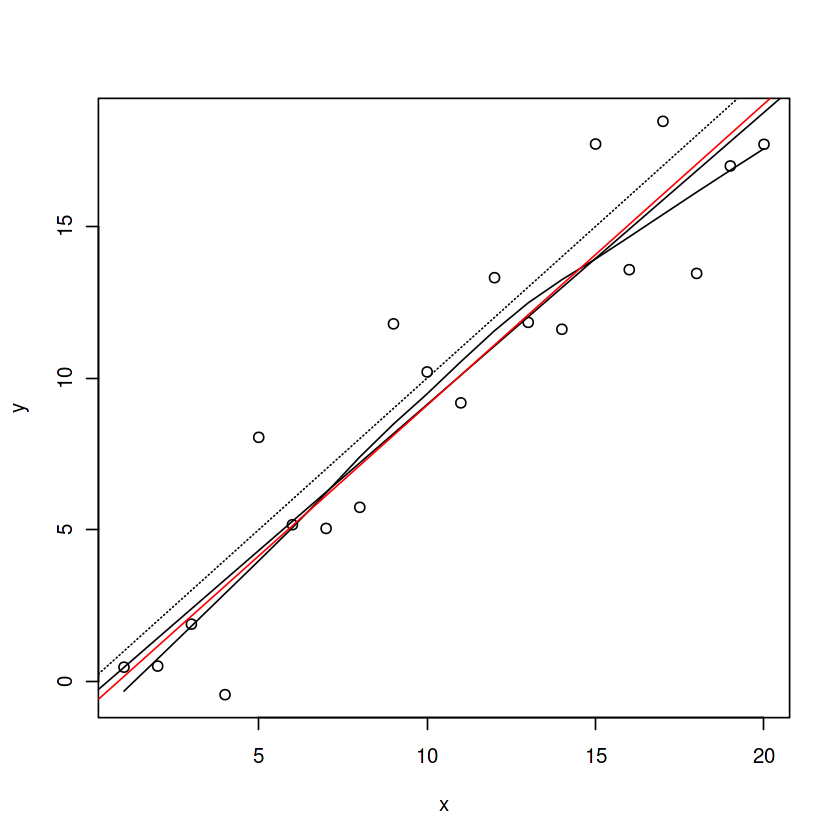

In [12]:
plot(x, y)
lines(x, lrf$y)
abline(0, 1, lty=3)
abline(coef(fm))
abline(coef(fm1), col = "red")


In [13]:
detach()

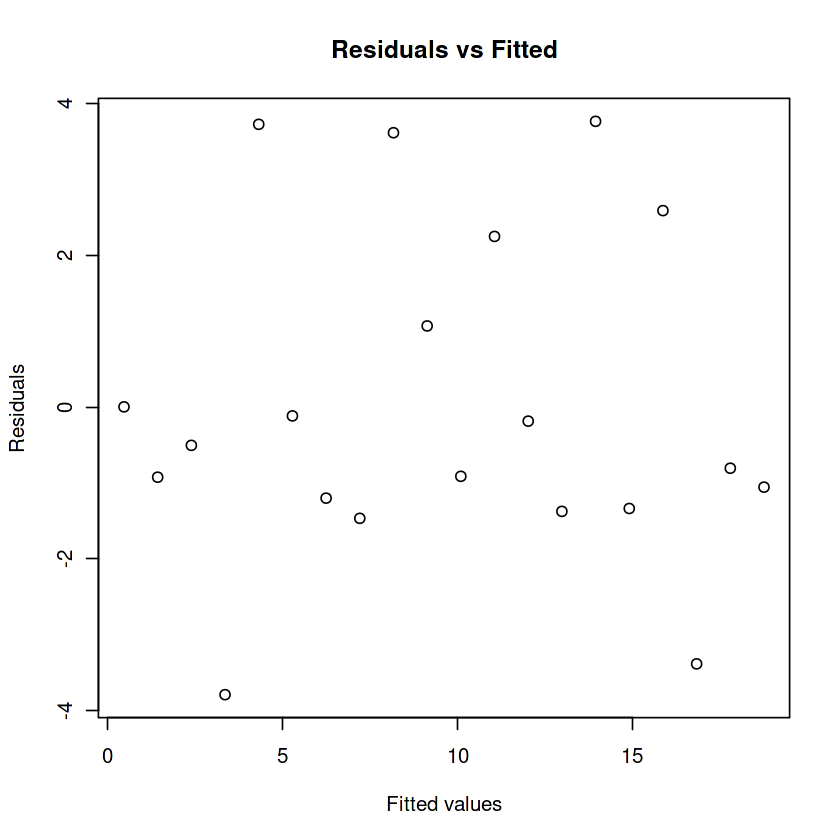

In [14]:
plot(fitted(fm), resid(fm),
     xlab="Fitted values",
     ylab="Residuals",
     main="Residuals vs Fitted")

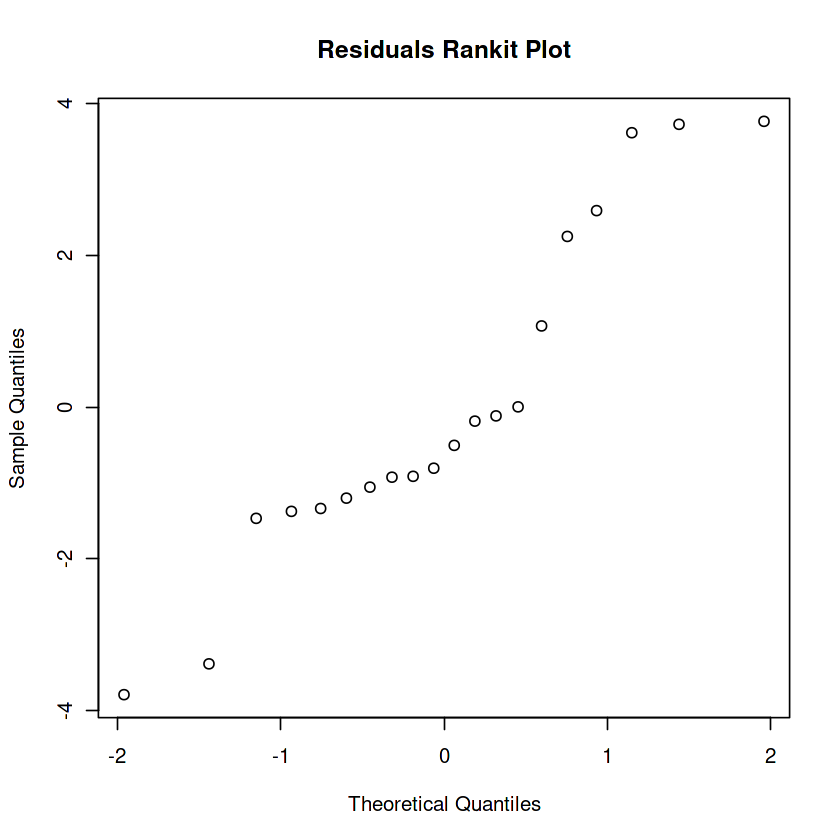

In [15]:
qqnorm(resid(fm), main="Residuals Rankit Plot")

In [16]:
rm(fm, fm1, lrf, x, dummy)

In [17]:
filepath <- system.file("data", "morley.tab" , package="datasets")
filepath

[1] "/usr/lib/R/library/datasets/data/morley.tab"

In [18]:
file.show(filepath)


R Information

    Expt  Run  Speed
001    1    1    850
002    1    2    740
003    1    3    900
004    1    4   1070
005    1    5    930
006    1    6    850
007    1    7    950
008    1    8    980
009    1    9    980
010    1   10    880
011    1   11   1000
012    1   12    980
013    1   13    930
014    1   14    650
015    1   15    760
016    1   16    810
017    1   17   1000
018    1   18   1000
019    1   19    960
020    1   20    960
021    2    1    960
022    2    2    940
023    2    3    960
024    2    4    940
025    2    5    880
026    2    6    800
027    2    7    850
028    2    8    880
029    2    9    900
030    2   10    840
031    2   11    830
032    2   12    790
033    2   13    810
034    2   14    880
035    2   15    880
036    2   16    830
037    2   17    800
038    2   18    790
039    2   19    760
040    2   20    800
041    3    1    880
042    3    2    880
043    3    3    880
044    3    4    860
045    3    5    720
046    3    6    72

In [19]:
mm <- read.table(filepath)
mm

,Expt,Run,Speed
,<int>,<int>,<int>
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850
007,1,7,950
008,1,8,980
009,1,9,980


In [20]:
mm$Expt <- factor(mm$Expt) # I suppose the dollar sign calls the column Expt
mm$Run <- factor(mm$Run)
mm$Expt

# Conceptually, factors are variables in R which take on a limited number of different values; such variables are often refered to as categorical variables.

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 [75] 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
Levels: 1 2 3 4 5

In [21]:
attach(mm)

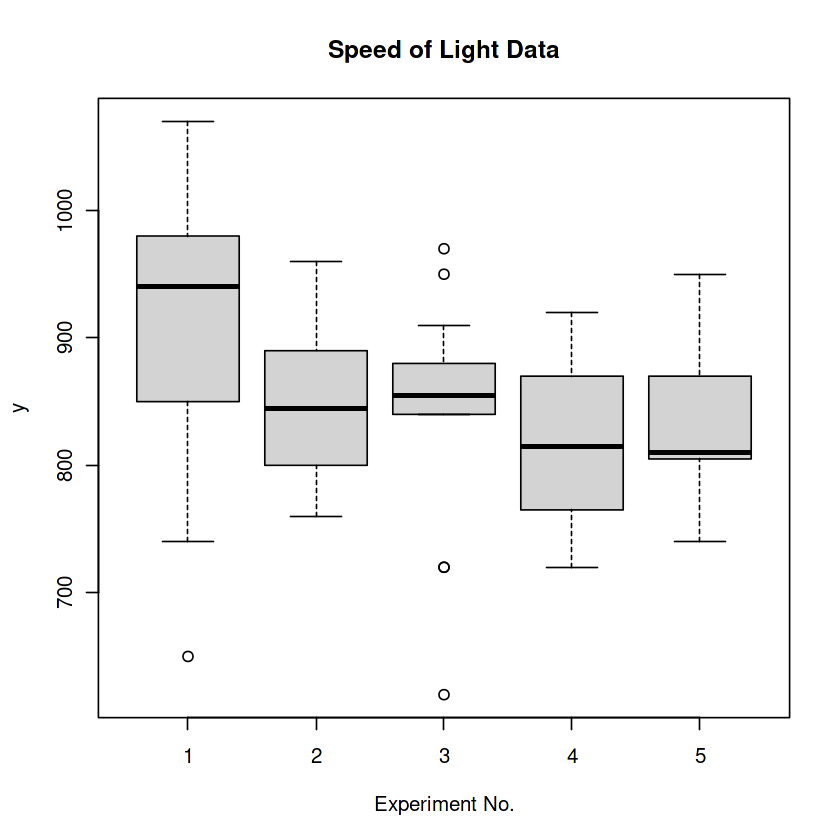

In [22]:
plot(Expt, Speed, main="Speed of Light Data", xlab="Experiment No.")

In [23]:
fm <- aov(Speed ~ Run + Expt, data=mm)
summary(fm)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Run         19 113344    5965   1.105 0.36321   
Expt         4  94514   23629   4.378 0.00307 **
Residuals   76 410166    5397                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [24]:
fm0 <- update(fm, . ~ . - Run)
anova(fm0, fm)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,95,523510,NA,NA,NA,NA
2,76,410166,19,113344,1.105348,0.3632093


In [25]:
detach()
rm(fm, fm0)

In [26]:
x <- seq(-pi, pi, len=50)
y <- x

In [27]:
x
y

[1] -3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.50045130
 [7] -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
[13] -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
[19] -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
[25] -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
[31]  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
[37]  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
[43]  2.24399475  2.37222302  2.50045130  2.62867957  2.75690784  2.88513611
[49]  3.01336438  3.14159265

[1] -3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.50045130
 [7] -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
[13] -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
[19] -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
[25] -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
[31]  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
[37]  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
[43]  2.24399475  2.37222302  2.50045130  2.62867957  2.75690784  2.88513611
[49]  3.01336438  3.14159265

In [28]:
f <- outer(x, y, function(x, y) cos(y)/(1 + x^2))

In [29]:
p <- 1:3
q <- 1:3
j <- outer(p,q)
p
q
j # So this is like a meshgrid, the function takes the indicies to calculate the value within the matrix

[1] 1 2 3

[1] 1 2 3

1,2,3
2,4,6
3,6,9


In [30]:
oldpar <- par(no.readonly = TRUE) # to query graphical paramters
par(pty="s")

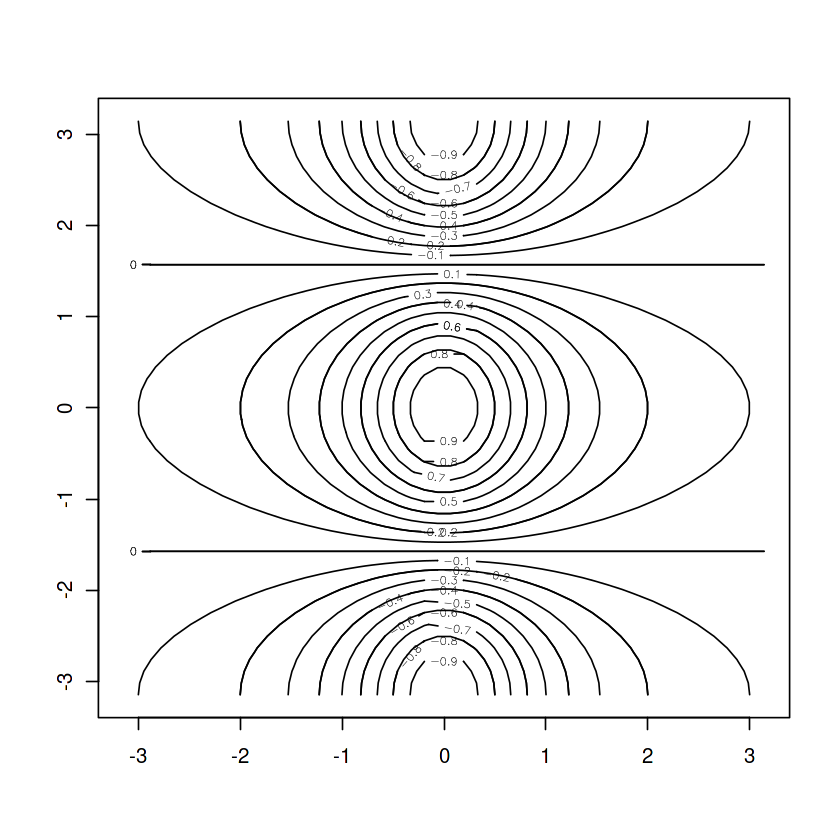

In [31]:
contour(x, y, f)
contour(x, y, f, nlevels=15, add=TRUE)

In [32]:
fa <- (f-t(f))/2

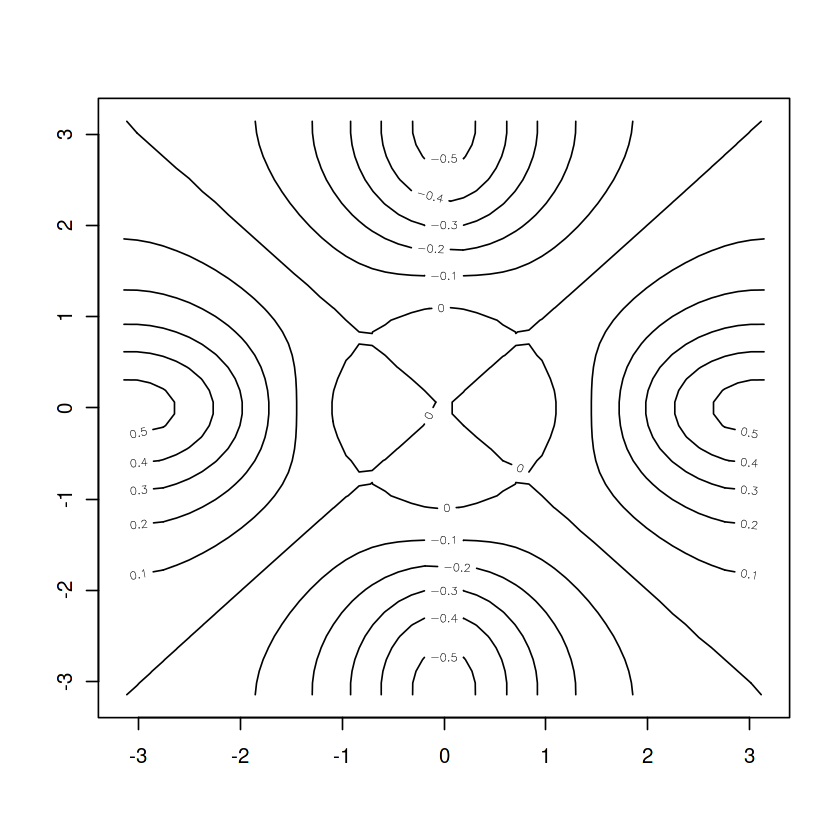

In [33]:
contour(x, y, fa, nlevels=15)

In [34]:
par(oldpar) # ??? I thought oldpar was assigned already

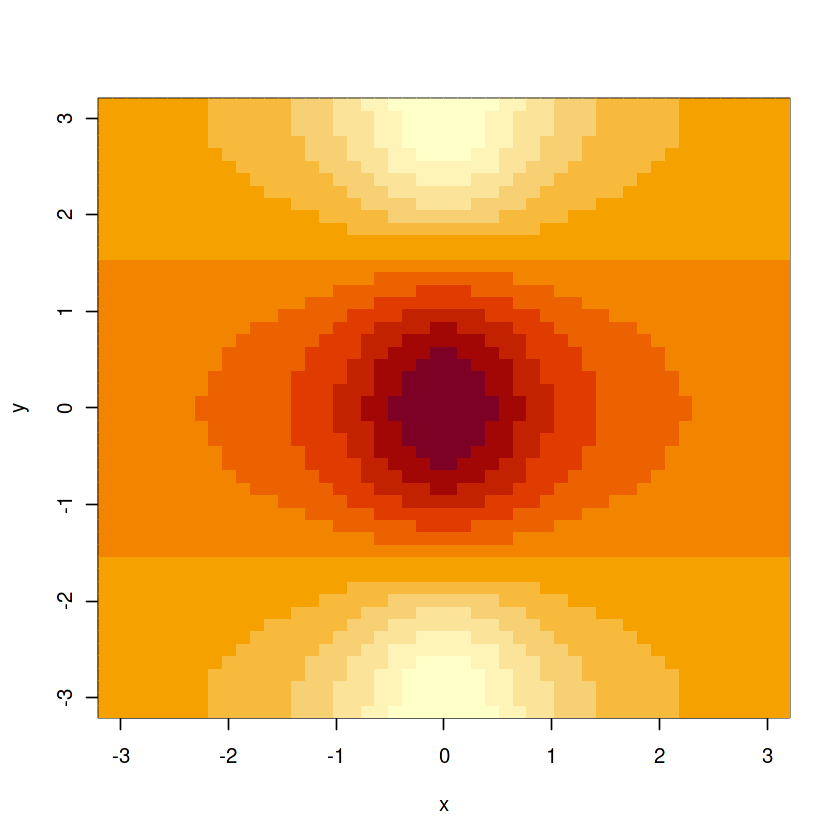

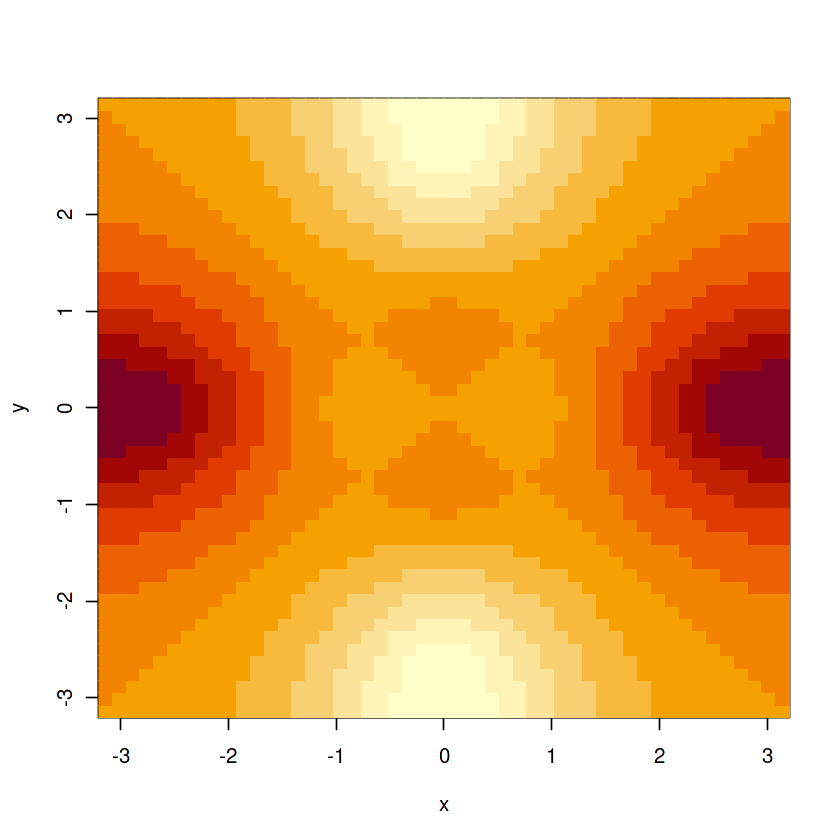

In [35]:
image(x, y, f)
image(x, y, fa)

In [36]:
objects(); rm(x, y, f, fa)

[1] "f"        "fa"       "filepath" "j"        "mm"       "oldpar"  
 [7] "p"        "q"        "w"        "x"        "y"

In [37]:
th <- seq(-pi, pi, len=100)
z <- exp(1i*th)
th
z

[1] -3.14159265 -3.07812614 -3.01465962 -2.95119310 -2.88772658 -2.82426006
  [7] -2.76079354 -2.69732703 -2.63386051 -2.57039399 -2.50692747 -2.44346095
 [13] -2.37999443 -2.31652792 -2.25306140 -2.18959488 -2.12612836 -2.06266184
 [19] -1.99919533 -1.93572881 -1.87226229 -1.80879577 -1.74532925 -1.68186273
 [25] -1.61839622 -1.55492970 -1.49146318 -1.42799666 -1.36453014 -1.30106362
 [31] -1.23759711 -1.17413059 -1.11066407 -1.04719755 -0.98373103 -0.92026451
 [37] -0.85679800 -0.79333148 -0.72986496 -0.66639844 -0.60293192 -0.53946541
 [43] -0.47599889 -0.41253237 -0.34906585 -0.28559933 -0.22213281 -0.15866630
 [49] -0.09519978 -0.03173326  0.03173326  0.09519978  0.15866630  0.22213281
 [55]  0.28559933  0.34906585  0.41253237  0.47599889  0.53946541  0.60293192
 [61]  0.66639844  0.72986496  0.79333148  0.85679800  0.92026451  0.98373103
 [67]  1.04719755  1.11066407  1.17413059  1.23759711  1.30106362  1.36453014
 [73]  1.42799666  1.49146318  1.55492970  1.61839622  1.68186273  1.74532925
 [79]  1.80879577  1.87226229  1.93572881  1.99919533  2.06266184  2.12612836
 [85]  2.18959488  2.25306140  2.31652792  2.37999443  2.44346095  2.50692747
 [91]  2.57039399  2.63386051  2.69732703  2.76079354  2.82426006  2.88772658
 [97]  2.95119310  3.01465962  3.07812614  3.14159265

[1] -1.0000000-0.0000000i -0.9979867-0.0634239i -0.9919548-0.1265925i
  [4] -0.9819287-0.1892512i -0.9679487-0.2511480i -0.9500711-0.3120334i
  [7] -0.9283679-0.3716625i -0.9029265-0.4297949i -0.8738494-0.4861967i
 [10] -0.8412535-0.5406408i -0.8052703-0.5929079i -0.7660444-0.6427876i
 [13] -0.7237340-0.6900790i -0.6785094-0.7345917i -0.6305527-0.7761465i
 [16] -0.5800569-0.8145760i -0.5272255-0.8497254i -0.4722711-0.8814534i
 [19] -0.4154150-0.9096320i -0.3568862-0.9341479i -0.2969204-0.9549022i
 [22] -0.2357589-0.9718116i -0.1736482-0.9848078i -0.1108382-0.9938385i
 [25] -0.0475819-0.9988673i  0.0158660-0.9998741i  0.0792500-0.9968548i
 [28]  0.1423148-0.9898214i  0.2048067-0.9788024i  0.2664738-0.9638422i
 [31]  0.3270680-0.9450008i  0.3863451-0.9223543i  0.4440666-0.8959938i
 [34]  0.5000000-0.8660254i  0.5539201-0.8325699i  0.6056097-0.7957618i
 [37]  0.6548607-0.7557496i  0.7014749-0.7126942i  0.7452644-0.6667690i
 [40]  0.7860531-0.6181590i  0.8236766-0.5670599i  0.8579834-0.5136774i
 [43]  0.8888354-0.4582265i  0.9161085-0.4009305i  0.9396926-0.3420201i
 [46]  0.9594930-0.2817326i  0.9754298-0.2203105i  0.9874389-0.1580014i
 [49]  0.9954719-0.0950560i  0.9994965-0.0317279i  0.9994965+0.0317279i
 [52]  0.9954719+0.0950560i  0.9874389+0.1580014i  0.9754298+0.2203105i
 [55]  0.9594930+0.2817326i  0.9396926+0.3420201i  0.9161085+0.4009305i
 [58]  0.8888354+0.4582265i  0.8579834+0.5136774i  0.8236766+0.5670599i
 [61]  0.7860531+0.6181590i  0.7452644+0.6667690i  0.7014749+0.7126942i
 [64]  0.6548607+0.7557496i  0.6056097+0.7957618i  0.5539201+0.8325699i
 [67]  0.5000000+0.8660254i  0.4440666+0.8959938i  0.3863451+0.9223543i
 [70]  0.3270680+0.9450008i  0.2664738+0.9638422i  0.2048067+0.9788024i
 [73]  0.1423148+0.9898214i  0.0792500+0.9968548i  0.0158660+0.9998741i
 [76] -0.0475819+0.9988673i -0.1108382+0.9938385i -0.1736482+0.9848078i
 [79] -0.2357589+0.9718116i -0.2969204+0.9549022i -0.3568862+0.9341479i
 [82] -0.4154150+0.9096320i -0.4722711+0.8814534i -0.5272255+0.8497254i
 [85] -0.5800569+0.8145760i -0.6305527+0.7761465i -0.6785094+0.7345917i
 [88] -0.7237340+0.6900790i -0.7660444+0.6427876i -0.8052703+0.5929079i
 [91] -0.8412535+0.5406408i -0.8738494+0.4861967i -0.9029265+0.4297949i
 [94] -0.9283679+0.3716625i -0.9500711+0.3120334i -0.9679487+0.2511480i
 [97] -0.9819287+0.1892512i -0.9919548+0.1265925i -0.9979867+0.0634239i
[100] -1.0000000+0.0000000i

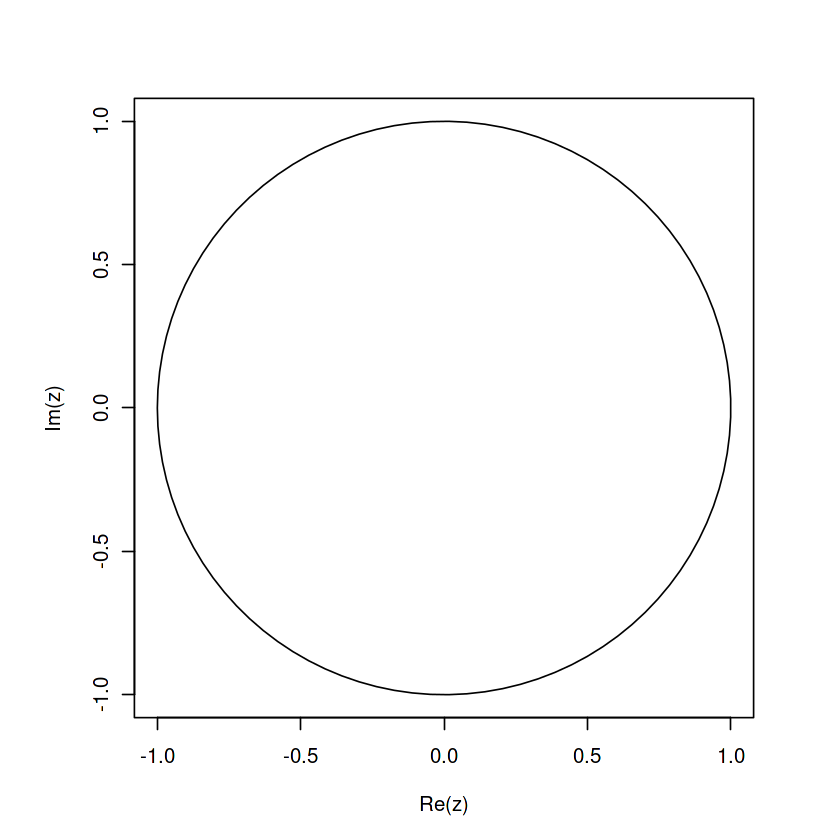

In [38]:
par(pty="s")
plot(z, type="l")

In [39]:
w <- rnorm(100) + rnorm(100)*1i
w

[1]  0.3035457-0.7931525i -0.4393585-0.4641631i -1.0496257-0.9235326i
  [4]  0.8002574-0.1004410i -1.2302193-2.1918548i -0.2998209-0.3741285i
  [7] -2.4812901-0.1740380i -0.8693399-1.0988229i  0.1961911+0.0669479i
 [10]  1.1717065+0.1827249i -0.2945528-1.6846504i -0.9025070-0.0791495i
 [13] -0.5484446+0.9774742i  1.4193086-0.0964035i -1.4735031+0.0751424i
 [16] -0.5820835-0.0615916i  0.2019169+1.3417962i -0.6518463+0.2078236i
 [19]  2.1358508+2.2805657i -1.1419854-0.1863686i  1.4817552+1.4294268i
 [22] -0.7420685-1.7663350i  2.3865468+0.9772728i  1.8621301-1.2362022i
 [25] -0.6115863+0.6770956i  0.3198606+1.2357479i  2.0967427+0.3261064i
 [28]  2.1904816+0.1252878i -0.8872245-0.8980478i  0.1267431-0.7892913i
 [31] -0.5546423-0.6048514i -1.1965991+1.3464564i  1.1516791+0.4767765i
 [34] -1.7316260+1.2901128i  0.0462804-0.4480469i -0.9712272+0.9151730i
 [37]  1.3082820+0.3358837i -0.0198364+0.6176578i  1.4252696+0.4516059i
 [40] -0.1157239+0.5330609i  0.1763202-0.6285729i -0.4845079-0.9320021i
 [43]  0.9541160+0.3702566i  0.1085290+1.1809169i  2.3878721+2.0847294i
 [46]  1.4997063+1.9527043i  0.2892798-0.6618375i  1.0999715-1.6238713i
 [49]  0.3633584+1.0509800i -0.2230697-2.1410028i -0.7338181-0.4129362i
 [52] -0.0142430-0.3573685i -1.7529142-0.6817131i  1.0057875+0.5987014i
 [55]  1.0910048-0.3446731i  0.1331402-1.7603657i -0.1530285+0.6720072i
 [58]  0.0394309+0.6697768i -1.3659002+0.0503067i -0.5343870-0.1800258i
 [61]  1.8732418+0.5539493i  0.1849075+0.1609270i  1.9396359+0.0025117i
 [64]  0.9716818-0.0002681i -0.4911799+0.4078951i  0.5995707+0.7087695i
 [67]  0.3321789+0.5347970i -1.7770803+1.4924273i  0.0782788-0.2576517i
 [70] -1.3863096-0.6219782i  0.0901862+0.1177168i -1.3620815+0.6356927i
 [73] -0.2278233-1.0750406i -0.5229371+0.0379240i -1.4841534-0.1959077i
 [76]  0.8931828-1.1689896i -0.3631571-0.0159694i  0.9073003+1.5004343i
 [79] -1.6633594-0.1927841i -0.4519638-0.4862456i -0.6840346+0.2391332i
 [82] -0.0535441+3.0898920i  1.5705413+0.5629227i -0.4109130+1.6966472i
 [85] -0.6611614+0.4028547i  1.7335956-0.5733821i  0.0101255-1.1331126i
 [88] -1.1518700-0.5438586i  2.5115058+0.7290045i -0.3389456+0.2690357i
 [91]  0.6069022-0.5248509i  0.3258096-1.0561123i -0.7594695-0.0529806i
 [94] -0.0570699+0.1297584i -1.6754325-0.0313459i  0.5309286+0.1816209i
 [97]  0.5450555+0.7047426i -0.5078636-0.0599892i -0.1671751+0.1092508i
[100] -0.5876595+1.7200679i

In [40]:
w <- ifelse(Mod(w) > 1, 1/w, w) 
w

[1]  0.3035457-0.7931525i -0.4393585-0.4641631i -0.5369955+0.4724855i
  [4]  0.8002574-0.1004410i -0.1947268+0.3469405i -0.2998209-0.3741285i
  [7] -0.4010432+0.0281292i -0.4428260+0.5597205i  0.1961911+0.0669479i
 [10]  0.8331931-0.1299345i -0.1007084+0.5759866i -0.9025070-0.0791495i
 [13] -0.4365737-0.7780906i  0.7013328+0.0476366i -0.6768945-0.0345187i
 [16] -0.5820835-0.0615916i  0.1096667-0.7287667i -0.6518463+0.2078236i
 [19]  0.2187735-0.2335966i -0.8529511+0.1391991i  0.3495646-0.3372197i
 [22] -0.2021652+0.4812109i  0.3588432-0.1469436i  0.3727448+0.2474520i
 [25] -0.6115863+0.6770956i  0.1963077-0.7584143i  0.4656660-0.0724250i
 [28]  0.4550320-0.0260262i -0.5567223+0.5635138i  0.1267431-0.7892913i
 [31] -0.5546423-0.6048514i -0.3687750-0.4149590i  0.7412586-0.3068690i
 [34] -0.3713609-0.2766749i  0.0462804-0.4480469i -0.5453808-0.5139042i
 [37]  0.7170949-0.1841044i -0.0198364+0.6176578i  0.6376072-0.2020299i
 [40] -0.1157239+0.5330609i  0.1763202-0.6285729i -0.4391141+0.8446824i
 [43]  0.9109138-0.3534915i  0.0771711-0.8397074i  0.2376458-0.2074764i
 [46]  0.2473876-0.3221129i  0.2892798-0.6618375i  0.2859375+0.4221252i
 [49]  0.2938394-0.8499029i -0.0481412+0.4620550i -0.7338181-0.4129362i
 [52] -0.0142430-0.3573685i -0.4955317+0.1927136i  0.7341236-0.4369918i
 [55]  0.8334064+0.2632919i  0.0427195+0.5648328i -0.1530285+0.6720072i
 [58]  0.0394309+0.6697768i -0.7311261-0.0269277i -0.5343870-0.1800258i
 [61]  0.4909050-0.1451689i  0.1849075+0.1609270i  0.5155598-0.0006676i
 [64]  0.9716818-0.0002681i -0.4911799+0.4078951i  0.5995707+0.7087695i
 [67]  0.3321789+0.5347970i -0.3299840-0.2771271i  0.0782788-0.2576517i
 [70] -0.6004691+0.2694049i  0.0901862+0.1177168i -0.6028587-0.2813582i
 [73] -0.1886555+0.8902174i -0.5229371+0.0379240i -0.6622459+0.0874162i
 [76]  0.4126867+0.5401206i -0.3631571-0.0159694i  0.2951053-0.4880260i
 [79] -0.5932242+0.0687549i -0.4519638-0.4862456i -0.6840346+0.2391332i
 [82] -0.0056065-0.3235388i  0.5642362-0.2022369i -0.1348378-0.5567412i
 [85] -0.6611614+0.4028547i  0.5199559+0.1719740i  0.0078856+0.8824543i
 [88] -0.7098974+0.3351800i  0.3672270-0.1065935i -0.3389456+0.2690357i
 [91]  0.6069022-0.5248509i  0.2667236+0.8645850i -0.7594695-0.0529806i
 [94] -0.0570699+0.1297584i -0.5966520+0.0111628i  0.5309286+0.1816209i
 [97]  0.5450555+0.7047426i -0.5078636-0.0599892i -0.1671751+0.1092508i
[100] -0.1778643-0.5206052i

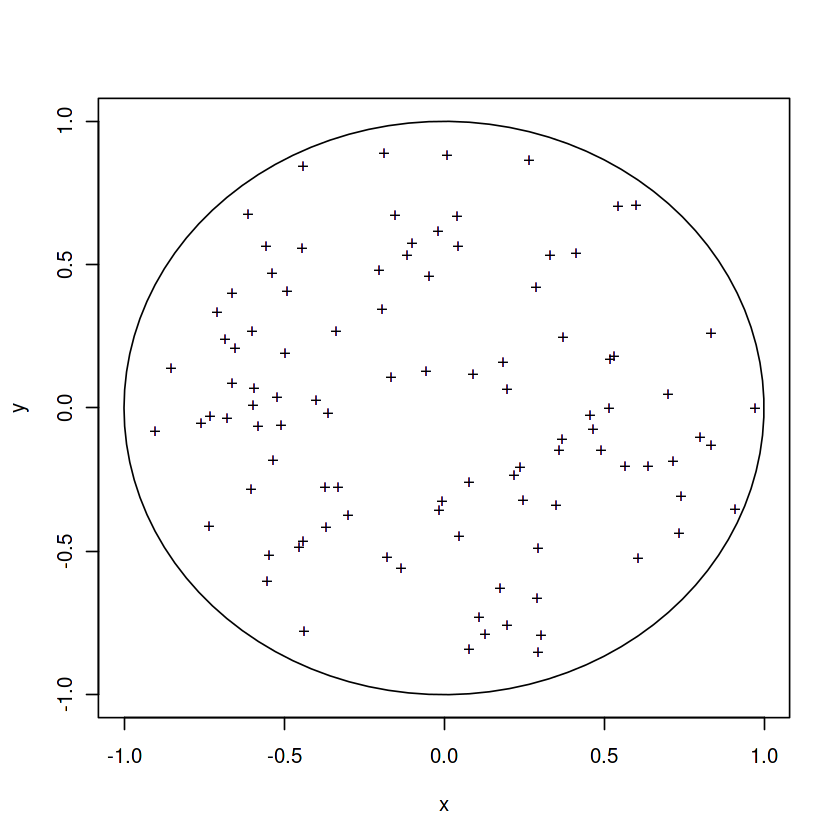

In [41]:
plot(w, xlim=c(-1,1), ylim=c(-1,1), pch="+",xlab="x", ylab="y")
lines(z)

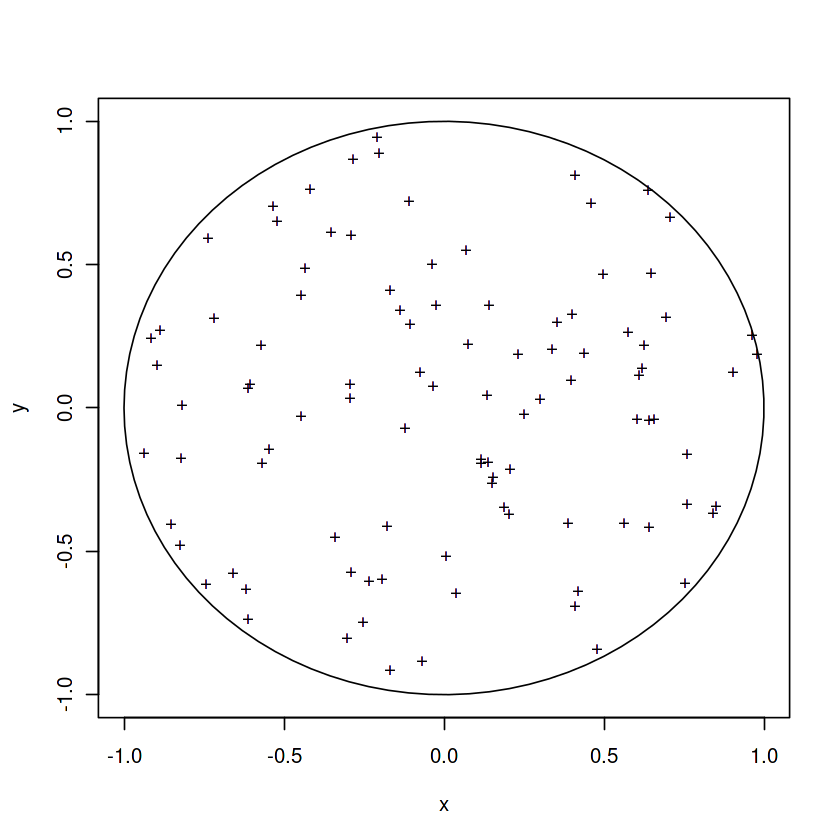

In [42]:
w <- sqrt(runif(100))*exp(2*pi*runif(100)*1i)
plot(w, xlim=c(-1,1), ylim=c(-1,1), pch="+", xlab="x", ylab="y")
lines(z)

In [43]:
rm(th, w, z)

## Two functions

In [1]:
x <- c(2:7)
x

[1] 2 3 4 5 6 7

In [2]:
five <- which(x %in% 5) # equivalent of where function
five

[1] 4

In [3]:
y <- c(3:8)
y

[1] 3 4 5 6 7 8

In [4]:
array <- rbind(x,y) # sort of like vstack
array

x,2,3,4,5,6,7
y,3,4,5,6,7,8
